# Cost Function 그리기

In [11]:
import numpy as np
import matplotlib.pyplot as plt

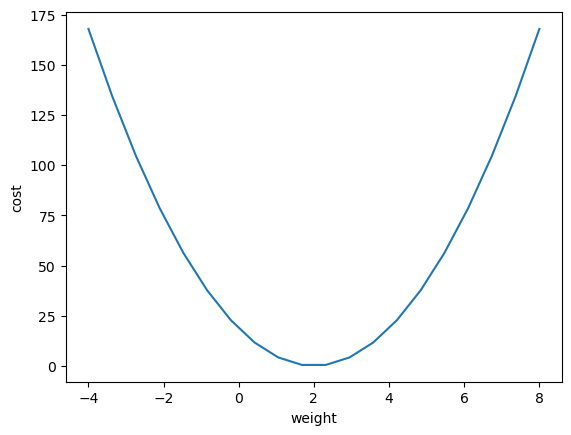

In [2]:
def MSE(w, x, y, b):
    s = 0
    for i in range(len(x)):
        s += (y[i] - (w*x[i]+b))**2   # y_hat = wx + b, (y-y_hat)^2
    return s / len(x)

# y = 2x + 0.1 모델 가정     => w = 2 일 때 오차 최소
x = [1., 2., 3.]  # 입력변수, 독립변수, Feature (특성값)
y = [2.1, 4.1, 6.1]  # 출력변수, 종속변수, Label (정답)
b = 0.1

w_val = []   # 비용함수 그래프의 x 축의 값
cost_val = []  # 비용함수 그래프의 y 축의 값

for w in np.linspace(-4, 8, 20):
    c = MSE(w, x, y, b)
    w_val.append(w)
    cost_val.append(c) 

plt.plot(w_val, cost_val)
plt.xlabel('weight')
plt.ylabel('cost')
plt.show()

# 가중치 학습

In [10]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

-0.09027529589850945 0.17055522598064407


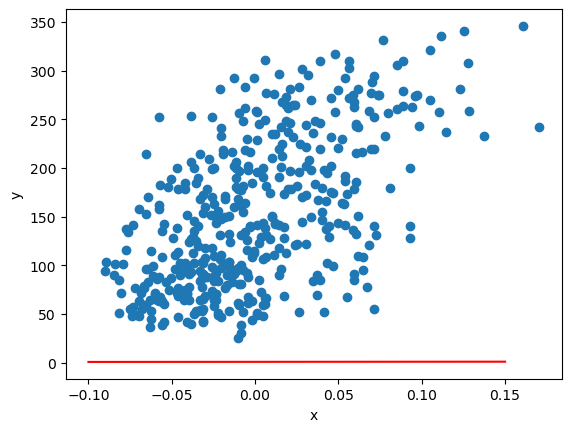

In [4]:
diabetes = load_diabetes()  # 당뇨병 환자 데이터 로드
# print(diabetes.DESCR)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# display(df.head())
sr = pd.Series(diabetes.target)  # 종속변수: 베이스라인 1년 후 질병 진행에 정량적 측정 값
# print(sr[:5])
print(np.min(df['bmi']), np.max(df['bmi']))

w = 1.0  # 초기 가중치 (임의의 값)
b = 1.0  # 초기 절편 (임의의 값)

pt1 = (-0.1, -0.1*w+b)  # 회귀선의 시작점 (x,y)
pt2 = (0.15, 0.15*w+b)  # 회귀선의 끝점 (x,y)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r')   # plot([x좌표 리스트], [y좌표 리스트])
plt.scatter(df['bmi'].values, sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

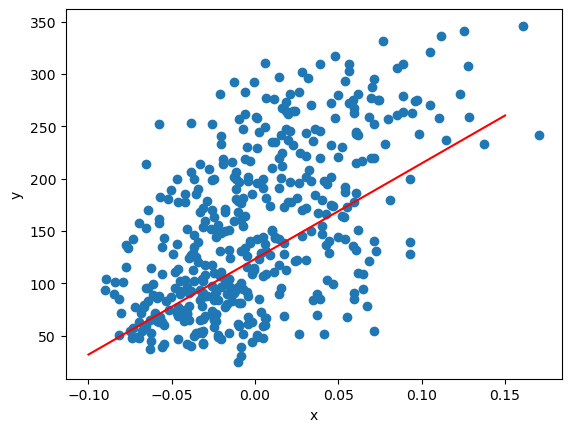

학습된 가중치:913.60
학습된 절편:123.39


In [7]:
x = df['bmi']
y = diabetes.target

w = 1.0
b = 1.0

for i in range(100):    # 100번 반복 학습
    for x_i, y_i in zip(x,y):
        y_hat = w*x_i + b  # 예측 값
        w = w - (y_hat - y_i) * x_i
        b = b - (y_hat - y_i)

pt1 = (-0.1, -0.1*w+b)  # 회귀선의 시작점 (x,y)
pt2 = (0.15, 0.15*w+b)  # 회귀선의 끝점 (x,y)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r')   # plot([x좌표 리스트], [y좌표 리스트])
plt.scatter(df['bmi'].values, sr.values)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f'학습된 가중치:{w:.2f}')
print(f'학습된 절편:{b:.2f}')

## scikit-learn을 이용한 회귀분석 비교
- scikit-learn: 머신러닝 알고리즘을 제공하는 패키지
- 공식 사이트: https://scikit-learn.org

In [12]:
from sklearn.linear_model import LinearRegression  # 회귀분석 모델 클래스

x = df['bmi'].values.reshape(-1,1)   # Series 객체를 다차원 배열로 가지고 와야 하기 때문
y = diabetes.target

# 선형회귀 모델 준비
model = LinearRegression()

# 학습 (fitting)
model.fit(x,y)  # y = wx + b

# 예측
y_hat = model.predict(x)

# print(model.coef_)   리스트로 결과 도출 , 따라서 가중치 구할 때 [0]로 슬라이싱
print(f'추정 계수(가중치):{model.coef_[0]:.2f}')
print(f'절편:{model.intercept_:.2f}')

plt.plot(x, y_hat, 'r')   # 학습된 회귀선
plt.scatter(x, y)
plt.show()

KeyError: 'bmi'

# LinearRegression

(70, 1) (30, 1) (70, 1) (30, 1)
MAE:1.52
RMSE:1.72
R-Square(결정계수):0.93
가중치:[[2.31220932]]
절편:[2.82796733]


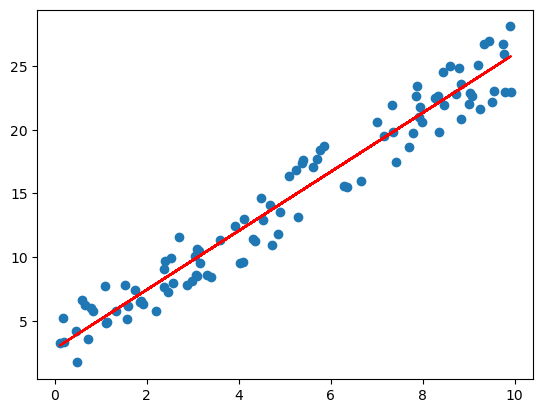

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) 데이터 준비
x = np.random.rand(100,1) * 10   # [0,10) 범위의 100x1 모양의 행렬도 정렬
y = (x * 2.3) + np.random.rand(100, 1) * 5.4   # y = 2.3x + 5.4 모형 가정

# 2) 모델 준비
model = LinearRegression()

# 3) 학습 데이터의 평가 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)   # train_zize = 0.7


print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 4) 학습 (Fitting)
model.fit(x_train, y_train)

# 5) 예측 및 평가
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_}')
print(f'절편:{model.intercept_}')

# 6) 예측 결과 시각화
plt.scatter(x,y)
plt.plot(x, model.predict(x),'r')
plt.show()

[문제] 키와 몸무게 데이터를 이용해 모델을 학습시킨 후, 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하세요.

MAE:7.87
RMSE:9.07
R-Square(결정계수):0.04
가중치:[[0.58799352]]
절편:[-29.84670553]
키 170인 사람의 예측 몸무게 [[70.11219281]]


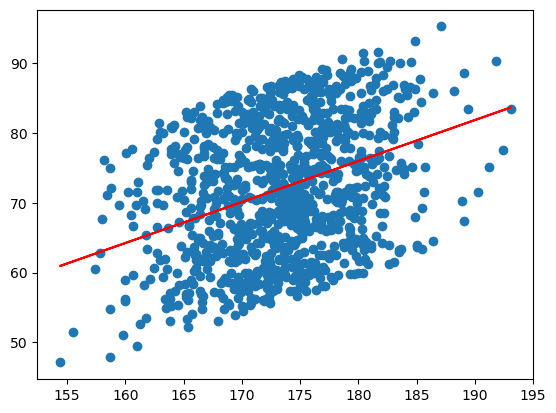

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비
df = pd.read_csv('./dataset/body.csv')

x = df['Height'].values.reshape(-1,1)
y = df['Weight'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 2) 모델 준비
model = LinearRegression()

# 3) 학습
model.fit(x_train, y_train)

# 4) 예측 및 평가
# 모델 성능을 측정하기 위한 예측
y_hat = model.predict(x_test)
print(f'MAE:{mean_absolute_error(y_test, y_hat):.2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R-Square(결정계수):{r2_score(y_test, y_hat):.2f}')
print(f'가중치:{model.coef_}')  # print(f'가중치:np.round({model.coef_}, 2)')   # 다변량 데이터일 경우,
print(f'절편:{model.intercept_}')

print('키 170인 사람의 예측 몸무게', model.predict([[170]]))

# 시각화
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [33]:
print(df[df['Height']==170]['Weight'].mean())

70.25714285714285


In [34]:
df[df['Height'].between(169, 171)]['Weight'].mean()

69.34271844660194

# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블록 그룹마다의 주택 가격 데이터
- total_rooms  = 블록 내 주택의 총 방의 개수
- total_bedrooms = 블록 내 주택의 총 침실 수
- households = 블록 내 총 가수 수
- median = _increase = 블록 내 가구의 소득 중앙값
- median_house_value = 블록 내 가구의 주택 매매가 중앙값 (종속변수)

In [52]:
import warnings
warnings.filterwarnings(action='ignore')

In [60]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


R스퀘어: 0.64


,Predict,Actual
0,368003.05,344700.0
1,168542.00,176500.0
2,280055.01,270500.0
3,250366.07,330000.0
4,110111.00,81700.0
5,84391.00,67000.0
6,94601.00,67000.0
7,161936.00,166900.0
8,172854.00,194400.0
9,133013.00,164200.0


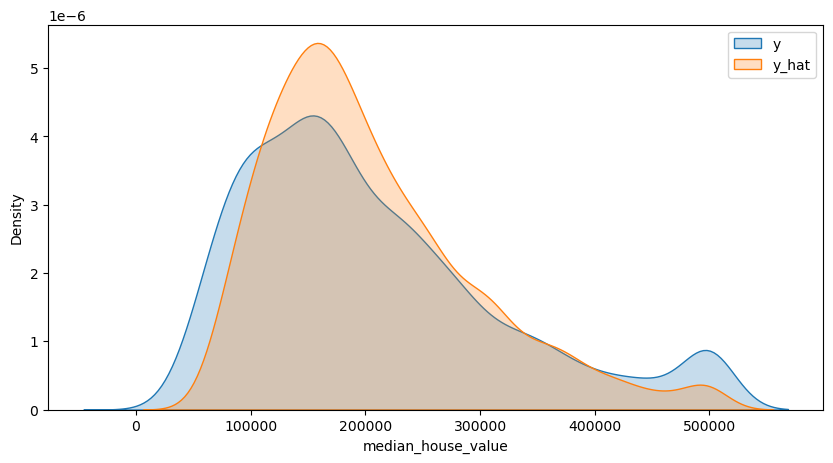

In [61]:
data = pd.read_csv('./dataset/california_housing_train.csv')
print(data.shape)
display(data.head())

features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

x_train = data[features]
y_train = data['median_house_value']

# 모델 형성
# model = LinearRegression()
# model = SGDRegressor()
model = RandomForestRegressor()

# 학습
model.fit(x_train, y_train)

# 평가용 데이터 불러오기
data_test = pd.read_csv('./dataset/california_housing_test.csv')

x_test = data_test[features]
y_test = data_test['median_house_value']

y_hat = model.predict(x_test)
print(f'R스퀘어: {r2_score(y_test, y_hat):.2f}')

sr_predict = pd.Series(np.round(y_hat[:10],2))
sr_actual = pd.Series(np.round(y_test[:10],2))
compare_df = pd.DataFrame({'Predict':sr_predict, 'Actual':sr_actual})
display(compare_df)

plt.figure(figsize=(10,5))
# kdeplot : 확률밀도 그래프 => 히스토그램과 유사하나 각 데이터의 구간별 빈도수를 확률적으로 추정하여 부드러운 곡선으로 표현한다.
sns.kdeplot(y_test, label='y', fill=True)
sns.kdeplot(y_hat, label='y_hat', fill=True)
plt.legend()
plt.show()